{0: (0, 30), 1: (1, 57), 2: (1, 8), 3: (1, 53), 4: (0, 72)}


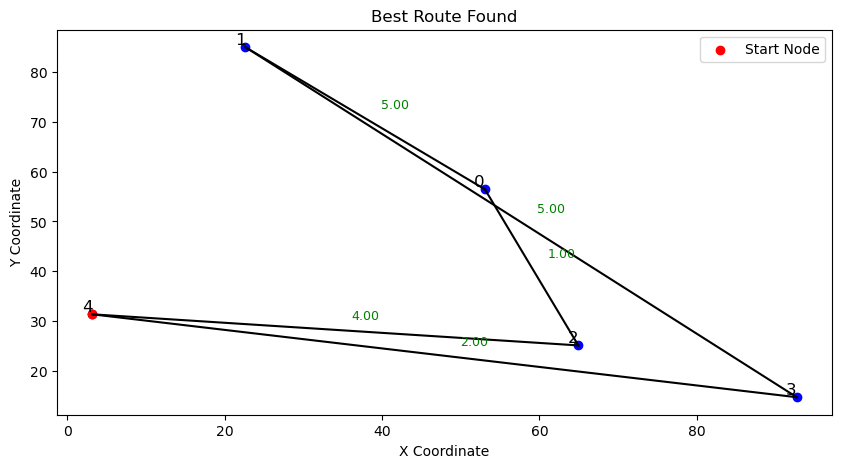

Best tour: [4, 3, 1, 0, 2]
Tour cost: 17.0


In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import deque

def generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup):
    matrice = [[float('inf') for _ in range(num_sommets)] for _ in range(num_sommets)]
    intervalles = {}

    for i in range(num_sommets):
        intervalle_start = random.randint(0, max_intervalle_inf)
        intervalle_end = intervalle_start + random.randint(max_intervalle_inf, max_intervalle_sup)
        intervalles[i] = (intervalle_start, intervalle_end)

    connected = set([0])
    while len(connected) < num_sommets:
        min_edge = (None, None, float('inf'))
        for u in connected:
            for v in range(num_sommets):
                if v not in connected and u != v:
                    poids = random.randint(1, max_poids_arete)
                    if poids < min_edge[2]:
                        min_edge = (u, v, poids)
        u, v, poids = min_edge
        if u is not None and v is not None:
            matrice[u][v] = poids
            matrice[v][u] = poids
            connected.add(v)

    for i in range(num_sommets):
        for j in range(i + 1, num_sommets):
            if matrice[i][j] == float('inf') and random.choice([True, False]):
                poids = random.randint(1, max_poids_arete)
                matrice[i][j] = poids
                matrice[j][i] = poids

    return np.array(matrice), intervalles

def calculate_cost(tour, matrice):
    cost = 0
    for i in range(len(tour) - 1):
        if matrice[tour[i]][tour[i + 1]] == float('inf'):
            return float('inf')
        cost += matrice[tour[i]][tour[i + 1]]
    if matrice[tour[-1]][tour[0]] == float('inf'):
        return float('inf')
    cost += matrice[tour[-1]][tour[0]]
    return cost

def is_within_intervals(tour, intervalles):
    for i in range(len(tour)):
        visit_time = i
        interval_start, interval_end = intervalles[tour[i]]
        if not (interval_start <= visit_time <= interval_end):
            return False
    return True

def generate_neighbor(tour, matrice, intervalles):
    attempts = 0
    max_attempts = 100  # Early termination threshold
    while attempts < max_attempts:
        i, j = random.sample(range(len(tour)), 2)
        tour[i], tour[j] = tour[j], tour[i]
        if calculate_cost(tour, matrice) != float('inf') and is_within_intervals(tour, intervalles):
            return tour
        attempts += 1
    return tour  # Return the original tour if no valid neighbor found

def hill_climbing(matrice, intervalles, max_iterations=1000):
    num_sommets = len(matrice)
    current_solution = list(range(num_sommets))
    random.shuffle(current_solution)

    while calculate_cost(current_solution, matrice) == float('inf') or not is_within_intervals(current_solution, intervalles):
        random.shuffle(current_solution)
    
    current_cost = calculate_cost(current_solution, matrice)

    for _ in range(max_iterations):
        neighbor = generate_neighbor(current_solution.copy(), matrice, intervalles)
        neighbor_cost = calculate_cost(neighbor, matrice)
        
        if neighbor_cost < current_cost and is_within_intervals(neighbor, intervalles):
            current_solution = neighbor
            current_cost = neighbor_cost

    return current_solution, current_cost

def plot_route(path, points, matrice):
    plt.figure(figsize=(10, 5))
    plt.scatter(points[:, 0], points[:, 1], c='blue')

    start_node = path[0]
    plt.scatter(points[start_node, 0], points[start_node, 1], c='red', label='Start Node')

    for idx, point in enumerate(points):
        plt.text(point[0], point[1], str(idx), fontsize=12, ha='right', va='bottom')

    for i in range(len(path) - 1):
        from_node = path[i]
        to_node = path[i + 1]
        plt.plot([points[from_node, 0], points[to_node, 0]], 
                 [points[from_node, 1], points[to_node, 1]], 'k-')
        mid_point = (points[from_node] + points[to_node]) / 2
        weight = matrice[from_node][to_node]
        plt.text(mid_point[0] + 2, mid_point[1] + 2, f'{weight:.2f}', fontsize=9, color='green')

    from_node = path[-1]
    to_node = path[0]
    plt.plot([points[from_node, 0], points[to_node, 0]], 
             [points[from_node, 1], points[to_node, 1]], 'k-')
    mid_point = (points[from_node] + points[to_node]) / 2
    weight = matrice[from_node][to_node]
    plt.text(mid_point[0] + 2, mid_point[1] + 2, f'{weight:.2f}', fontsize=9, color='green')

    plt.title('Best Route Found')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

# Example usage
num_sommets = 5 
max_poids_arete = 10 
max_intervalle_inf = 1
max_intervalle_sup = 100
tsp_matrice, tsp_intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup)

solution, cost = hill_climbing(tsp_matrice, tsp_intervalles)
print(tsp_intervalles)
if solution:
    points = np.random.rand(num_sommets, 2) * 100 
    plot_route(solution, points, tsp_matrice)

print("Best tour:", solution)
print("Tour cost:", cost) 